<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW1_Kmeans_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling 

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries and Read the Data from CSV

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
path = '/content/drive/My Drive/Asteroid_Updated.csv'

data = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
data.head(10)

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
5,Hebe,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0,6034,5.71,N,N,185.18,NaN,0.2679,7.274500,NaN,0.822,0.399,NaN,S,S,0.24,0.973965,MBA,0.260972,1379.459705,86.197923
6,Iris,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,5206,5.51,N,N,199.83,NaN,0.2766,7.139000,NaN,0.855,0.484,NaN,S,S,NaN,0.846100,MBA,0.267535,1345.619196,140.419656
7,Flora,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0,2744,6.49,N,N,147.491,NaN,0.2260,12.865000,NaN,0.885,0.489,NaN,NaN,S,0.28,0.874176,MBA,0.301681,1193.313717,194.882895
8,Metis,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0,2649,6.28,N,N,190,NaN,0.1180,5.079000,NaN,0.858,0.496,NaN,NaN,S,0.17,1.106910,MBA,0.267484,1345.875362,276.861623
9,Hygiea,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0,3409,5.43,N,N,407.12,NaN,0.0717,27.630000,7.0000,0.696,0.351,NaN,C,C,NaN,1.778390,MBA,0.177007,2033.818284,152.184851


## Check Missing and Drop Rows With No Data For Diameter and Rotation Period Data Feature . There are 83% Missing Diameter Data and 3% Missing Rotation Period Data

In [17]:
data.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [18]:
data.shape

(839714, 31)

In [12]:
data.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [13]:
dia_percent_missing = (702078/839714) * 100
dia_percent_missing

83.60918122122533

In [14]:
rotation_period_missing = (820918/839714) * 100
rotation_period_missing

97.76161883688971

## Drop Missing Rows Data for Diameter and Rotation Period

In [19]:
data = data.dropna(subset=['diameter','rot_per'])
data.shape

(11188, 31)

In [20]:
data.isnull().sum()

name               5761
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
extent            11172
albedo               34
rot_per               0
GM                11174
BV                10205
UB                10245
IR                11187
spec_B            10066
spec_T            10246
G                 11069
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

In [17]:
data.round(1)

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.8,0.1,10.6,80.3,73.6,2.6,3.0,4.6,8822.0,0,1002,3.3,N,N,939.4,964.4 x 964.2 x 891.8,0.1,9.1,62.6,0.7,0.4,NaN,C,G,0.1,1.6,MBA,0.2,1683.1,77.4
1,Pallas,2.8,0.2,34.8,173.1,310.0,2.1,3.4,4.6,72318.0,0,8490,4.1,N,N,545,582x556x500,0.1,7.8,14.3,0.6,0.3,NaN,B,B,0.1,1.2,MBA,0.2,1686.2,59.7
2,Juno,2.7,0.3,13.0,169.9,248.1,2.0,3.4,4.4,72684.0,0,7104,5.3,N,N,246.596,NaN,0.2,7.2,NaN,0.8,0.4,NaN,Sk,S,0.3,1.0,MBA,0.2,1592.8,34.9
3,Vesta,2.4,0.1,7.1,103.8,150.7,2.2,2.6,3.6,24288.0,0,9325,3.2,N,N,525.4,572.6 x 557.2 x 446.4,0.4,5.3,17.8,0.8,0.5,NaN,V,V,0.3,1.1,MBA,0.3,1325.4,95.9
4,Astraea,2.6,0.2,5.4,141.6,358.7,2.1,3.1,4.1,63507.0,0,2916,6.8,N,N,106.699,NaN,0.3,16.8,NaN,0.8,0.4,NaN,S,S,NaN,1.1,MBA,0.2,1508.6,282.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694201,NaN,2.3,0.6,12.2,182.7,325.8,1.0,3.5,3.4,1038.0,1,529,19.3,Y,Y,0.653,NaN,0.1,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,APO,0.3,1240.3,188.0
699814,NaN,2.3,0.6,25.5,178.8,82.0,1.0,3.5,3.4,227.0,3,563,18.8,Y,N,0.453,NaN,0.3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,APO,0.3,1237.1,158.0
704641,NaN,0.9,0.3,26.4,257.6,144.5,0.6,1.1,0.8,1495.0,1,299,18.9,Y,Y,0.325,NaN,0.3,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ATE,1.3,286.6,315.5
721964,NaN,2.8,0.7,23.8,277.5,115.4,0.9,4.6,4.6,8438.0,0,317,17.9,Y,N,0.694,NaN,0.3,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,APO,0.2,1678.0,350.9


## Check the diameter and rotation period data if all Numeric. Diameter data is Object 

In [21]:
data.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,11188.000000,11188.000000,11188.000000,11188.000000,11188.000000,11188.000000,11188.000000,11188.000000,11188.00000,11188.000000,11188.000000,11154.000000,11188.000000,1.400000e+01,983.000000,943.000000,1.00,119.000000,11188.000000,11188.000000,11188.000000,11188.000000
mean,2.779236,0.151046,9.627074,178.123898,175.627491,2.361651,3.196821,4.829644,18146.09966,1568.495263,13.336766,0.191055,23.566011,7.821928e+00,0.770041,0.365006,-0.33,0.178739,1.381669,0.234549,1764.027333,177.451046
std,1.182358,0.090520,6.914192,103.207737,103.570016,0.810493,1.773115,7.038733,11753.50312,762.843533,2.026919,0.142057,74.829904,1.678880e+01,0.087852,0.095784,NaN,0.134603,0.800556,0.093660,2570.897249,103.289813
min,0.642196,0.001141,0.042710,0.000738,0.026563,0.092048,0.999956,0.514647,3.00000,51.000000,3.200000,0.008000,0.029952,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,0.000166,0.002489,187.974705,0.057141
25%,2.386762,0.091108,4.404671,92.791170,85.971896,1.987885,2.790189,3.687415,8780.50000,974.750000,12.300000,0.070000,4.670000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,0.997351,0.187335,1346.828239,88.507158
50%,2.663624,0.139279,8.457703,171.779133,170.516653,2.264351,3.065596,4.347279,13976.00000,1561.000000,13.600000,0.171000,7.560000,6.192500e-01,0.743000,0.363000,-0.33,0.190000,1.279900,0.226723,1587.843790,175.119504
75%,3.024991,0.192696,13.063146,270.162992,266.077611,2.652792,3.394470,5.261316,24723.00000,2130.000000,14.600000,0.273000,14.579500,6.500000e+00,0.850000,0.439500,-0.33,0.250000,1.659543,0.267295,1921.695650,264.723491
max,53.920190,0.954480,118.969965,359.915763,359.988886,40.465671,105.385948,395.945419,72684.00000,9325.000000,29.900000,1.000000,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,39.507000,1.915151,144619.064198,359.989549


In [22]:
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

## Convert Diameter Data to Float

In [23]:
data['diameter'] = data['diameter'].astype(float) 
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter          float64
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

# 2. Perform Kmeans and Agglomerative Clustering Using Ward linkage

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [27]:
X = data.iloc[:, [15, 18]].values

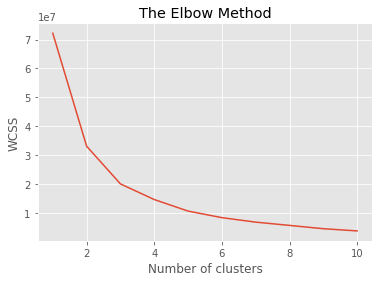

In [39]:
from sklearn.cluster import KMeans
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [41]:
# Check the values gathered if correct
print(X)
X.dtype

[[9.39400e+02 9.07417e+00]
 [5.45000e+02 7.81320e+00]
 [2.46596e+02 7.21000e+00]
 ...
 [3.25000e-01 1.60000e+01]
 [6.94000e-01 5.20600e+00]
 [1.62600e+00 6.83000e+00]]


dtype('float64')

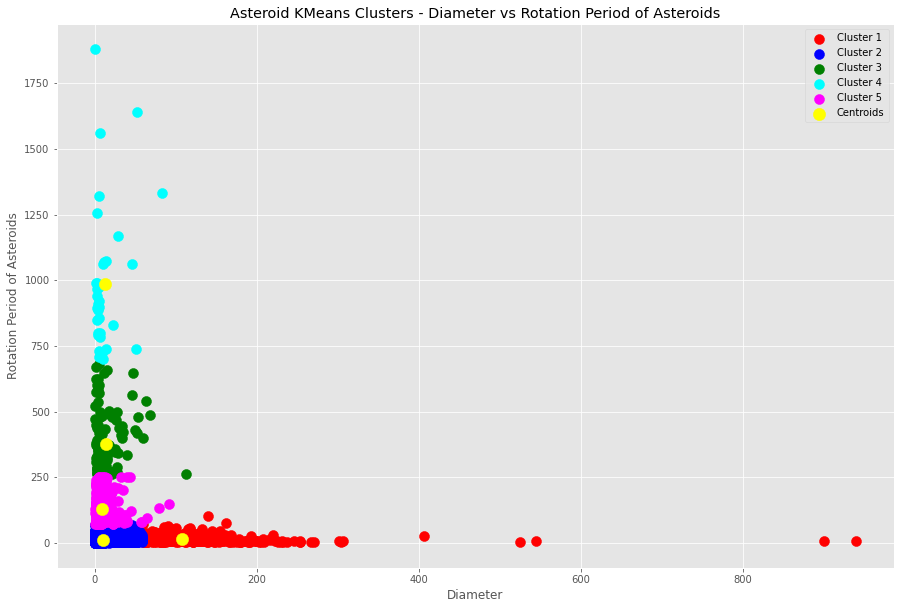

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Asteroid KMeans Clusters - Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.legend()
plt.show()

In [101]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Agglomerative Clustering Using Ward Method
[1 1 1 ... 4 4 4]


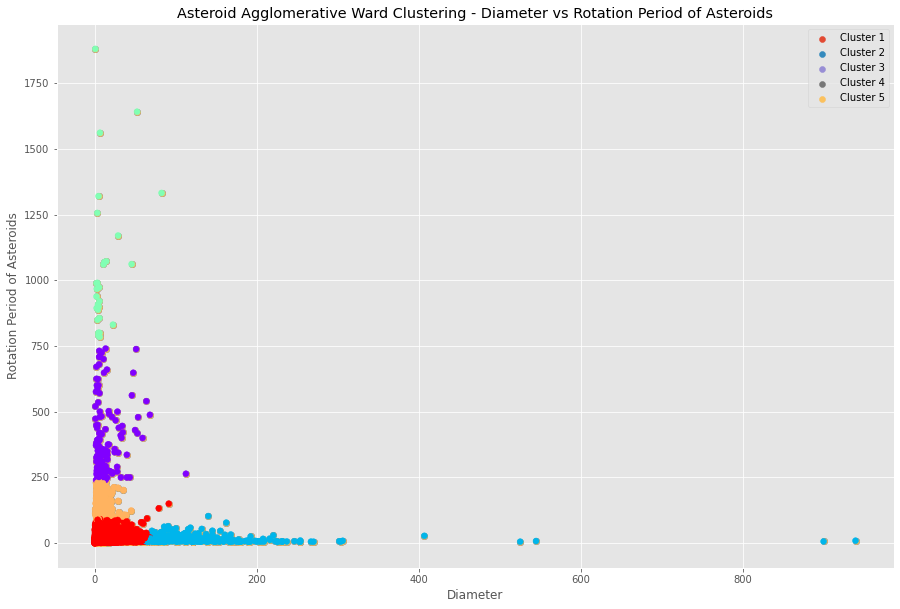

In [102]:
# Using Ward Linkage Method
plt.figure(figsize=(15,10))
data1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_pred = data1.fit_predict(X)
print('Agglomerative Clustering Using Ward Method')
print(hc_pred)
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 1')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 2')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 3')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 4')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 5')
plt.scatter(X[:, 0], X[:, 1], c=data1.labels_, cmap='rainbow')
plt.title('Asteroid Agglomerative Ward Clustering - Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.legend()
plt.show()

# 3. Implement Kmeans Pytorch

In [165]:
!pip install kmeans-pytorch

In [166]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [167]:
# data
data_size, dims, num_clusters = X, 2, 3
x = torch.from_numpy(X)

In [168]:
print(x)

tensor([[9.3940e+02, 9.0742e+00],
        [5.4500e+02, 7.8132e+00],
        [2.4660e+02, 7.2100e+00],
        ...,
        [3.2500e-01, 1.6000e+01],
        [6.9400e-01, 5.2060e+00],
        [1.6260e+00, 6.8300e+00]], dtype=torch.float64)


In [169]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean'
)

[running kmeans]: 19it [00:00, 102.10it/s, center_shift=0.007634, iteration=20, tol=0.000100]

running k-means on cpu..


[running kmeans]: 21it [00:00, 104.10it/s, center_shift=0.000000, iteration=21, tol=0.000100]


In [170]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 1, 1,  ..., 2, 2, 2])
tensor([[ 14.2387, 584.2184],
        [108.0407,  15.8052],
        [ 10.0519,  17.4214]])


In [171]:
# more data
y = np.random.randn(3, dims) / 6
y_kmeans = torch.from_numpy(y)

In [172]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y_kmeans, cluster_centers, 'euclidean'
)

predicting on cpu..


In [173]:
print(cluster_ids_y)

tensor([2, 2, 2])


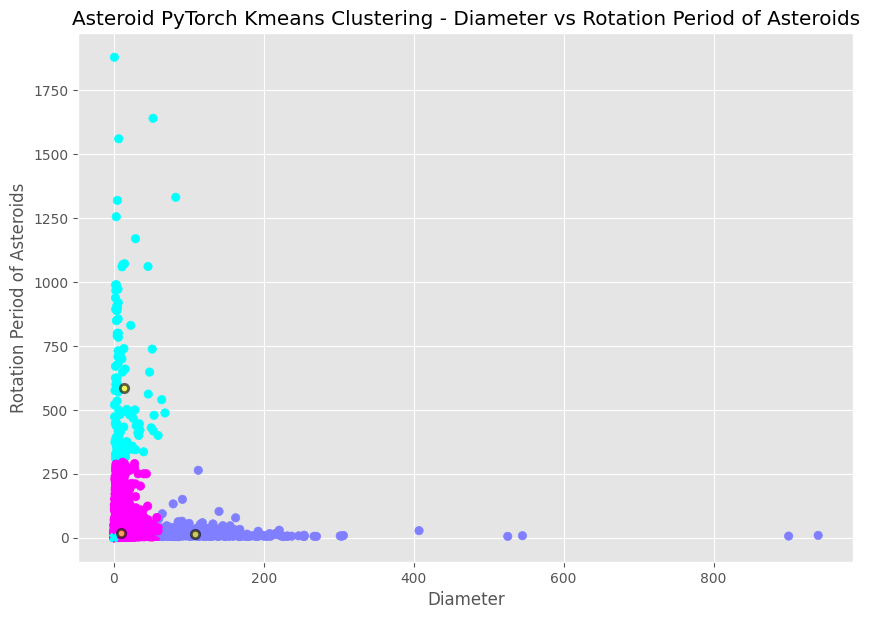

In [174]:
# plot
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', alpha=0.6, edgecolors='black', linewidths=2)
plt.title('Asteroid PyTorch Kmeans Clustering - Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.show()
